# TP4 - Big Data y Machine Learning (UBA)
### Grupo 4
**Parte C: Clasificación supervisada usando EPH (años 2004 y 2024)**

Se entrenan dos modelos:
- Regresión Logística
- K-Vecinos más Cercanos (KNN)

Se evalúan con Accuracy, matriz de confusión, curva ROC y AUC.


Procesando año 2004


📆 AÑO 2004 - Logistic Regression
Matriz de confusión:
[[205   1]
 [  0  33]]
Accuracy: 0.9958
AUC: 0.9990


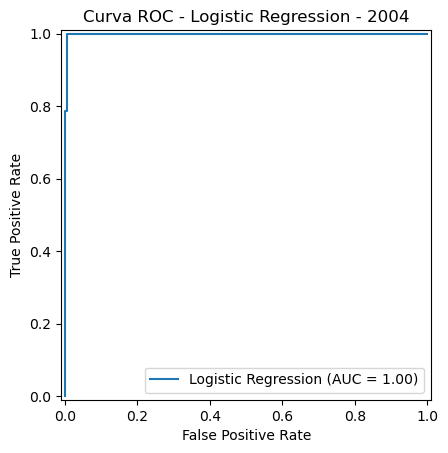



📆 AÑO 2004 - KNN (K=5)
Matriz de confusión:
[[206   0]
 [  3  30]]
Accuracy: 0.9874
AUC: 0.9992


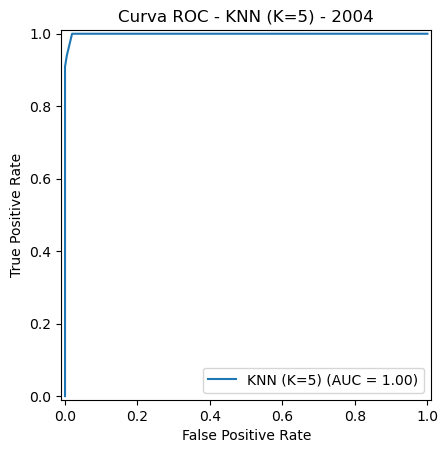


Procesando año 2024


📆 AÑO 2024 - Logistic Regression
Matriz de confusión:
[[303   1]
 [  0  19]]
Accuracy: 0.9969
AUC: 0.9971


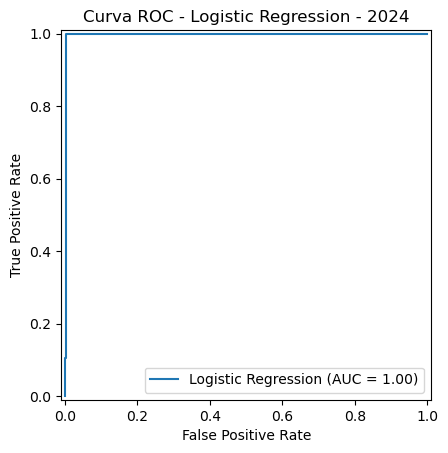



📆 AÑO 2024 - KNN (K=5)
Matriz de confusión:
[[301   3]
 [  1  18]]
Accuracy: 0.9876
AUC: 0.9976


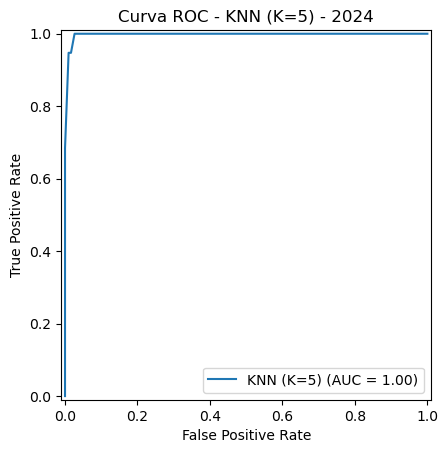



========= RESUMEN COMPARATIVO ===========

AÑO 2004:
  LOGIT: Accuracy = 0.996, AUC = 0.999
  KNN: Accuracy = 0.987, AUC = 0.999

AÑO 2024:
  LOGIT: Accuracy = 0.997, AUC = 0.997
  KNN: Accuracy = 0.988, AUC = 0.998


In [5]:

# TP4 - Parte C - Clasificación
# Autor: Grupo 4

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ----------------------
# FUNCIONES AUXILIARES
# ----------------------

def evaluar_modelo(modelo, X_test, y_test, nombre_modelo, anio):
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    print(f"\n\n📆 AÑO {anio} - {nombre_modelo}")
    print("Matriz de confusión:")
    print(cm)
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC: {roc_auc:.4f}")

    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=nombre_modelo).plot()
    plt.title(f"Curva ROC - {nombre_modelo} - {anio}")
    plt.show()

    return acc, roc_auc

# ----------------------
# CARGA Y PREPARACION
# ----------------------

def preparar_datos(ruta_train, ruta_test):
    # Variables independientes
    variables = ['P21', 'ingreso_ajustado', 'salario_semanal', 'edad', 'horastrab', 'edad2', 'educ']

    df_train = pd.read_excel(ruta_train)
    df_test = pd.read_excel(ruta_test)

    # Eliminamos valores nulos o infinitos
    df_train = df_train.replace([np.inf, -np.inf], np.nan).dropna()
    df_test = df_test.replace([np.inf, -np.inf], np.nan).dropna()

    X_train = df_train[variables]
    y_train = df_train['desocupado']
    X_test = df_test[variables]
    y_test = df_test['desocupado']

    # Escalamos variables para KNN
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train, y_train, X_test, y_test, X_train_scaled, X_test_scaled

# ----------------------
# PROCESO GENERAL
# ----------------------

def correr_modelos_para_anio(anio):
    print(f"\n==================\nProcesando año {anio}\n==================")
    ruta_train = f"base_entrenamiento_{anio}.xlsx"
    ruta_test = f"base_prueba_{anio}.xlsx"

    X_train, y_train, X_test, y_test, X_train_scaled, X_test_scaled = preparar_datos(ruta_train, ruta_test)

    # Modelo 1: Regresión Logística
    logit = LogisticRegression(max_iter=1000)
    logit.fit(X_train, y_train)
    acc_logit, auc_logit = evaluar_modelo(logit, X_test, y_test, "Logistic Regression", anio)

    # Modelo 2: KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_scaled, y_train)
    acc_knn, auc_knn = evaluar_modelo(knn, X_test_scaled, y_test, "KNN (K=5)", anio)

    return {
        "anio": anio,
        "logit": {"accuracy": acc_logit, "auc": auc_logit},
        "knn": {"accuracy": acc_knn, "auc": auc_knn}
    }

# ----------------------
# MAIN: Ejecutar para ambos años
# ----------------------

resultados_2004 = correr_modelos_para_anio(2004)
resultados_2024 = correr_modelos_para_anio(2024)

# ----------------------
# Mostrar resumen final
# ----------------------

def resumen_final(result_2004, result_2024):
    print("\n\n========= RESUMEN COMPARATIVO ===========")
    for r in [result_2004, result_2024]:
        anio = r["anio"]
        print(f"\nAÑO {anio}:")
        for modelo in ["logit", "knn"]:
            acc = r[modelo]["accuracy"]
            auc_val = r[modelo]["auc"]
            print(f"  {modelo.upper()}: Accuracy = {acc:.3f}, AUC = {auc_val:.3f}")

resumen_final(resultados_2004, resultados_2024)
